In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

epochs = 100
batch_size = 8

def passar_vgg(x, y):
    model = applications.VGG16(include_top=False, weights='imagenet')
    bottleneck_features_train = model.predict(x)
    
    return (bottleneck_features_train, y)
  

def train_top_model():
#     train_data = np.load(open('./cChess/Weights/bottleneck_features_train.npy', "rb"))
#     train_labels = np.load(open('./cChess/Weights/bottleneck_labels.npy',"rb"))

    
    
    model = Sequential()
    
    model.add(Flatten(input_shape=(1, 1, 512)))

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    
    model.add(Dropout(0.5))

    model.add(Dense(12, activation='softmax'))


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

#     model.fit(train_data, train_labels,
#               epochs=epochs,
#               batch_size=batch_size,
#               validation_split=.2)
#     model.save_weights("./cChess/Weights/bottleneck512.h5")
    model.load_weights("Models/2805_570Blenders.h5")
    
    return model
#save_bottlebeck_features(x,y, x_test,y_test)
model = train_top_model()

In [2]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'RandomBoard_TestSets/Blender Test Sets/Test Labels',  # this is the target directory
        target_size=(50, 50),  # all images will be resized to 150x150
        batch_size=64,
        class_mode='categorical')

Found 32 images belonging to 12 classes.


In [3]:
x_test, y_test = test_generator.next()

In [4]:
p = passar_vgg(x_test, y_test)

In [5]:
model.predict(p[0])[0]

array([0.0000000e+00, 0.0000000e+00, 4.2711105e-22, 8.9617577e-15,
       0.0000000e+00, 6.2028994e-28, 0.0000000e+00, 0.0000000e+00,
       7.3032609e-08, 9.9999988e-01, 0.0000000e+00, 3.1292360e-15],
      dtype=float32)

In [6]:
model.evaluate(p[0], p[1])

32/32 [==============================] - 0s 1ms/step


[0.14901116490364075, 0.90625]

In [7]:
model.predict_classes(p[0])

array([ 9,  3,  3, 11,  8,  2,  9,  9,  7,  2,  4,  9, 11,  8,  5,  3,  6,
        3,  9,  9,  3,  6,  9,  5, 10,  3,  4,  1,  9,  0,  3,  3])

In [8]:
np.argmax(p[1], axis = 1)

array([ 9,  3,  3, 11,  8,  2,  9,  9,  7,  2,  4,  9, 11,  9,  5,  3,  6,
        3,  8,  9,  3,  6,  9,  5, 10,  3,  0,  1,  9,  0,  3,  3])

In [9]:
np.mean(np.equal(model.predict_classes(p[0]), np.argmax(p[1], axis = 1)))

0.90625

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

9


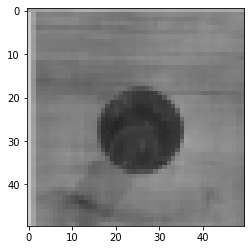

In [11]:
n = 0
print(np.argmax(p[1], axis = 1)[n])
plt.imshow(x_test[n])

[1.3231268e-17 0.0000000e+00 1.0000000e+00 2.1136606e-10 0.0000000e+00
 4.5124076e-25 0.0000000e+00 0.0000000e+00 2.0360114e-19 5.1483719e-28
 0.0000000e+00 0.0000000e+00]


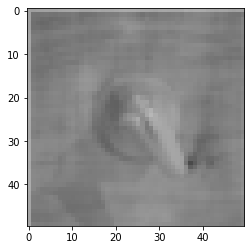

In [12]:
y_pred = model.predict(p[0])

plt.imshow(x_test[5])
print(y_pred[5])

In [13]:
y_pred_rafael_otario = np.argmax(y_pred, axis = 1)
y_test_rafael_otario = np.argmax(y_test, axis = 1)
y_test_rafael_otario

array([ 9,  3,  3, 11,  8,  2,  9,  9,  7,  2,  4,  9, 11,  9,  5,  3,  6,
        3,  8,  9,  3,  6,  9,  5, 10,  3,  0,  1,  9,  0,  3,  3])

In [14]:
y_pred_rafael_otario

array([ 9,  3,  3, 11,  8,  2,  9,  9,  7,  2,  4,  9, 11,  8,  5,  3,  6,
        3,  9,  9,  3,  6,  9,  5, 10,  3,  4,  1,  9,  0,  3,  3])

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Confusion matrix, without normalization
[[1 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 7 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2]]


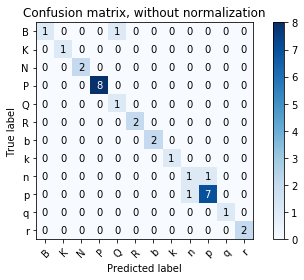

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    print(unique_labels(y_true, y_pred))
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)
class_names = ['B', 'K', 'N', 'P', 'Q', 'R', 'b', 'k', 'n', 'p', 'q', 'r']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_rafael_otario, y_pred_rafael_otario, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(y_test_rafael_otario, y_pred_rafael_otario, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()